# _Dataset Sanction Eco_
***semaine Random Forest***

In [112]:
#! pip install missingno

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats
import missingno as msno
import xlrd

## _Découverte des données_

In [2]:
df =  pd.read_excel('data/DATABASE.xls', skiprows=2, header=1)

In [3]:
df.head()

,Case no.b,Sender c,Sender 2c,Sender 3c,Targetd,Goal,US casee,US unilateral casef,Foreign policy goal categoryg,First yearh,...,Cost to target per capitabb,Trade linkagecc,GNP \nratiodd,Health and stabilityee,Sanction typeff,Cost to sendergg,"GDP growth (percent, 5-year average)hh","Inflation (percent,\n 3-year average)ii",Target International Monetary Fund codejj,Country groupkk
0,14-1,UNITED KINGDOM,NaN,NaN,GERMANY,Military victory,0.0,0.0,4.0,1914.0,...,12.58,9,1.0,3.0,"F,X,M",4.0,3.58,2.86667,134,1.0
1,17-1,UNITED STATES,NaN,NaN,JAPAN,Shipping for Allies,1.0,1.0,5.0,1917.0,...,0.44,20.5,13.0,3.0,X,2.0,5.4,25.6,158,1.0
2,18-1,UNITED KINGDOM,NaN,NaN,RUSSIA,Destabilize Bolsheviks,0.0,0.0,2.0,1918.0,...,2.49,18.5,1.0,1.0,"F,X,M",3.0,n.a.,n.a.,922,2.0
3,21-1,LEAGUE OF NATIONS,NaN,NaN,YUGOSLAVIA,Military disruption vs. Albania,0.0,0.0,3.0,1921.0,...,--,26.5,37.0,2.0,--,2.0,-1.5,n.a.,188,2.0
4,25-1,LEAGUE OF NATIONS,NaN,NaN,GREECE,Withdraw from Bulgaria,0.0,0.0,3.0,1925.0,...,--,36,56.0,2.0,--,2.0,3.3,48.8,174,1.0


In [4]:
df.shape

(246, 39)

In [5]:
df.columns

Index(['Case no.b', 'Sender c', 'Sender 2c', 'Sender 3c', 'Targetd', 'Goal',
       'US casee', 'US unilateral casef', 'Foreign policy goal categoryg',
       'First yearh', 'Last yeari', 'Policy resultj',
       'Sanctions contributionk', 'Success \nscorel', 'Companion policiesm',
       'International cooperationn', 'International assistanceo',
       'Cooperating international organizationp',
       'International organization senderq',
       'International organization sender & target membersr',
       'Length (years)s', 'Prior relationst',
       'Regime Type \n(DEMOC 1st year)u', 'Regime Type2 (Polity2 1st year)v',
       'Regime Type3 \n(Scale 1st year)w', 'Political stability priorx',
       'Political stability duringy', 'Cost to targetz',
       'Cost to target (percent of GNP)aa', 'Cost to target per capitabb',
       'Trade linkagecc', 'GNP \nratiodd', 'Health and stabilityee',
       'Sanction typeff', 'Cost to sendergg',
       'GDP growth (percent, 5-year average)hh',
 

### Séparation des commentaires sur les cols  
Qui se trouvent dans les 42 dernières lignes du DF

In [6]:
#row -42 to end, first col
df_comment = df.iloc[-42:,0].copy()

In [7]:
df_comment.index

RangeIndex(start=204, stop=246, step=1)

In [8]:
#drop 5 row inutile
df_comment.drop(df.index[204:209], inplace = True)

In [9]:
#reindex a partir de 0
df_comment=df_comment.reset_index(drop=True)

- choisir l'index d'une ligne pour voire un commentaire correspondant à une col.

In [10]:
df_comment[:]

0     a. This is the database used for the statistic...
1     b. Cases involving multiple goals, phases, or ...
2     c. The sender, in some cases more than one, ta...
3     d. The target is the country against which san...
4     e. A dummy variable equal to 1 when the US is ...
5     f. A dummy variable equal to 1 when the US imp...
6     g. The numbers in this column correspond to th...
7     h. This is the year of the first recorded sanc...
8     i. This is the year when the case ends, either...
9     j. The policy result indicates the extent to w...
10    k. The sanctions contribution indicates the ex...
11    l. The success score is an index on a scale of...
12    m. Types of companion policies are covert acti...
13    n. The extent of international cooperation wit...
14    o. International assistance to target, indicat...
15    p. A cooperating international organization is...
16    q. A dummy variable where 1 indicates that an ...
17    r. A dummy variable where 1 indicates that

***

### Type de valeurs présentes

In [11]:
df.dtypes.value_counts()

object     23
float64    16
dtype: int64

In [12]:
#dataTypeDf = pd.DataFrame(df.dtypes.value_counts()).reset_index().rename(columns={"index":"variableType",0:"count"})
#dataTypeDf
#fig,ax = plt.subplots()
#fig.set_size_inches(20,5)

#sn.barplot(data= dataTypeDf,x="variableType",y="count",ax=ax)
#ax.set(xlabel='Variable Type', ylabel='Count',title="Variables Count Across Datatype")

### Données manquantes

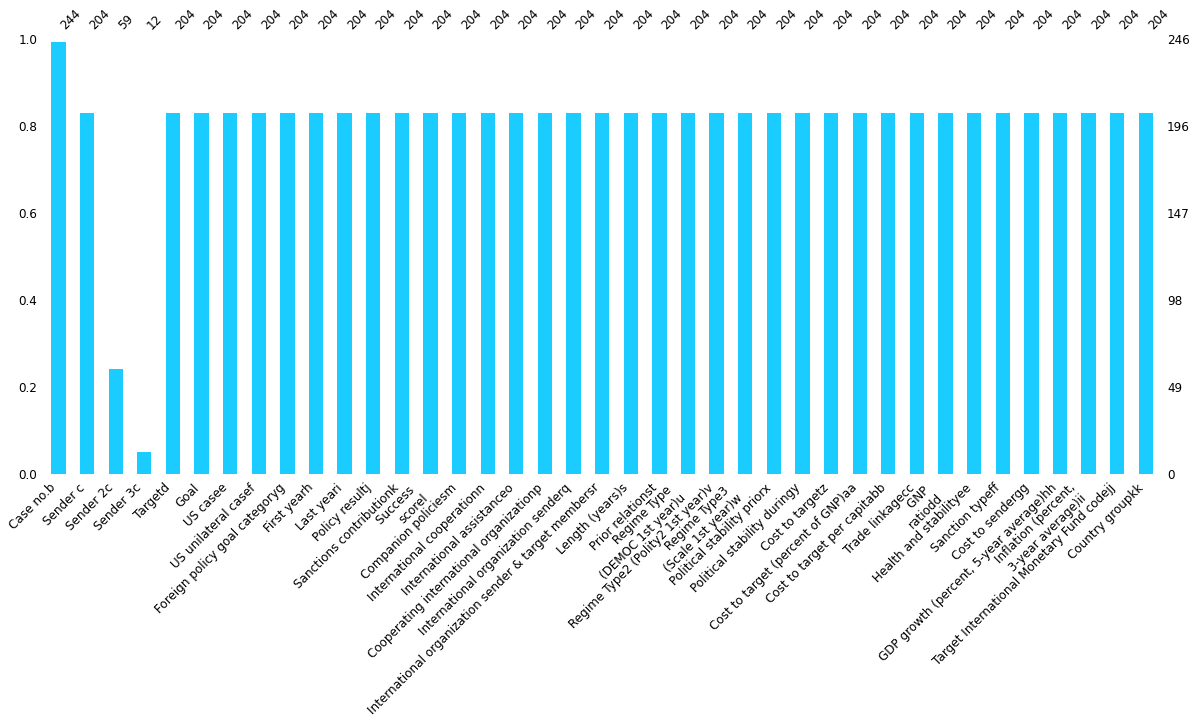

In [13]:
val_manq = df.columns[df.isnull().any()].tolist()

msno.bar(df[val_manq],\
            figsize=(20,8),color=(0.1, 0.8, 1),fontsize=12,labels=True,)
plt.show()

In [14]:
df.iloc[20]

Case no.b                                                                                 48-3
Sender c                                                                                  USSR
Sender 2c                                                                                  NaN
Sender 3c                                                                                  NaN
Targetd                                                UNITED STATES, (UNITED KINGDOM, FRANCE)
Goal                                                                           Berlin blockade
US casee                                                                                     0
US unilateral casef                                                                          0
Foreign policy goal categoryg                                                                5
First yearh                                                                               1948
Last yeari                                        

In [15]:
len(val_manq)

39

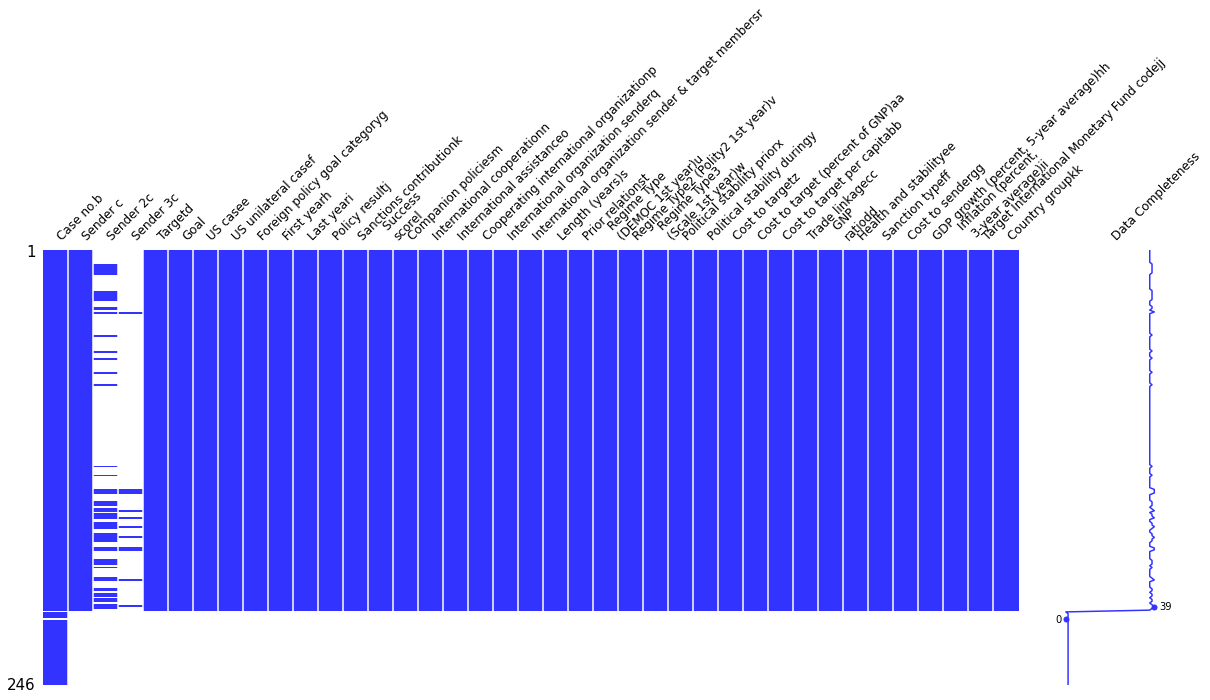

In [16]:
msno.matrix(df[val_manq],width_ratios=(10,1), figsize=(20,8),color=(0.2, 0.2, 1)
                                        ,fontsize=12,sparkline=True,labels=True)
plt.show()

In [17]:
df.columns

Index(['Case no.b', 'Sender c', 'Sender 2c', 'Sender 3c', 'Targetd', 'Goal',
       'US casee', 'US unilateral casef', 'Foreign policy goal categoryg',
       'First yearh', 'Last yeari', 'Policy resultj',
       'Sanctions contributionk', 'Success \nscorel', 'Companion policiesm',
       'International cooperationn', 'International assistanceo',
       'Cooperating international organizationp',
       'International organization senderq',
       'International organization sender & target membersr',
       'Length (years)s', 'Prior relationst',
       'Regime Type \n(DEMOC 1st year)u', 'Regime Type2 (Polity2 1st year)v',
       'Regime Type3 \n(Scale 1st year)w', 'Political stability priorx',
       'Political stability duringy', 'Cost to targetz',
       'Cost to target (percent of GNP)aa', 'Cost to target per capitabb',
       'Trade linkagecc', 'GNP \nratiodd', 'Health and stabilityee',
       'Sanction typeff', 'Cost to sendergg',
       'GDP growth (percent, 5-year average)hh',
 

In [18]:
df = df.iloc[:-42].copy()
df.shape

(204, 39)

## Nettoyage des colonnes 10 à 20

In [19]:
df.iloc[:, 10:20].columns

Index(['Last yeari', 'Policy resultj', 'Sanctions contributionk',
       'Success \nscorel', 'Companion policiesm', 'International cooperationn',
       'International assistanceo', 'Cooperating international organizationp',
       'International organization senderq',
       'International organization sender & target membersr'],
      dtype='object')

In [20]:
for col in df.iloc[:, 10:20]:
    print(f" Répartition True / False des valeurs vides de la colonne {col}: \
          {df.loc[:, col].isna().value_counts()}")

Répartition True / False des valeurs vides de la colonne Last yeari:           False    204
Name: Last yeari, dtype: int64
 Répartition True / False des valeurs vides de la colonne Policy resultj:           False    204
Name: Policy resultj, dtype: int64
 Répartition True / False des valeurs vides de la colonne Sanctions contributionk:           False    204
Name: Sanctions contributionk, dtype: int64
 Répartition True / False des valeurs vides de la colonne Success 
scorel:           False    204
Name: Success \nscorel, dtype: int64
 Répartition True / False des valeurs vides de la colonne Companion policiesm:           False    204
Name: Companion policiesm, dtype: int64
 Répartition True / False des valeurs vides de la colonne International cooperationn:           False    204
Name: International cooperationn, dtype: int64
 Répartition True / False des valeurs vides de la colonne International assistanceo:           False    204
Name: International assistanceo, dtype: int64
 Réparti

Sur les colonnes 10 à 20 il n'y a pas de valeurs vides a proprement dit

### Les valeurs non numériques des colonnes first year et last year colonne 9 et 10

In [32]:
print(f" Nature des données des colonnes First year et last year :\n {df.iloc[:, 9:11].dtypes}")

Nature des données des colonnes First year et last year :
 First yearh    int64
Last yeari     int64
dtype: object


Premier constat les dates ne sont pas des entiers. Nous  allons y remédier. La colonne First Year est remplie de nombre réels. Le passage un entiers est simple.

In [22]:
df["First yearh"] = df["First yearh"].copy().astype('int')
print(f" Natures des données des colonnes First year :\n {df['First yearh'].dtypes}")

Natures des données des colonnes First year :
 int64


Dans le cas de last year composés de string il faut d'abord vérifier si toutes les valeurs sont numériques

In [23]:
print(f"Nombre de valeurs non numériques de la colonne Last Year : \
      {df['Last yeari'].str.isalnum().value_counts()[0]}")
print("Lignes ou les les valeurs Last Year sont non numériques")
df['Last yeari'].loc[df['Last yeari'].str.isalnum() == 0]

Nombre de valeurs non numériques de la colonne Last Year :       16
Lignes ou les les valeurs Last Year sont non numériques


16     --
26     --
27     --
43     --
84     --
125    --
128    --
136    --
137    --
139    --
140    --
141    --
152    --
162    --
168    --
180    --
Name: Last yeari, dtype: object

Nous remplaçons les valeurs "--" par 0 afin de pouvoir réaliser une conversion des valeurs en entiers

In [24]:
df["Last yeari"].replace('--', 0, inplace = True)
df["Last yeari"] = df["Last yeari"].copy().astype('int')
print(f" Natures des données des colonnes Last year :\n {df['First yearh'].dtypes}")

Natures des données des colonnes Last year :
 int64


Afin de caractériser les Last Year à zéro nous créons une colonne available_last_year composée de boléaens : 0 si pas de Last Year et 1 si Last Year

In [25]:
df["available_last_year"] = (df["Last yeari"] != 0).astype("int")

In [28]:
print(f" nombre de  valeur available_last_year à 0 : {df['available_last_year'].loc[df['available_last_year'] == 0].value_counts()[0]}")

nombre de  valeur available_last_year à 0 : 16


In [31]:
df["Policy resultj"]

dtype('float64')

### Exploitation des colonnes Policy result, Sanction contributions, sucess score

le Sucess score est le résultat de la multiplication, par sanction de la valeur Policity result et de la valeur Sanction contributions. Une valeur égales ou supérieur à 9 indique une sanction efficaces. cette information servira de label pour la construction du modèle.

Nous commençons par vérifier la nature des information de la colonne. Et s'il y a des valeurs enexistantes/

In [62]:
for col in df.loc[:, ["Policy resultj", 
                "Sanctions contributionk",
                "Success \nscorel"]]:


    print(f"Pour la colonne {col} :")
    print("\n")

    print(f" Nature des variables :\
    {df[col].dtypes} \n")
    
    print("\n")

    print(f" Répartition True / False des valeurs vides: \
          {df.loc[:, col].isna().value_counts()}")

    print("\n")

Pour la colonne Policy resultj :


 Nature des variables :    float64 



 Répartition True / False des valeurs vides:           False    204
Name: Policy resultj, dtype: int64


Pour la colonne Sanctions contributionk :


 Nature des variables :    float64 



 Répartition True / False des valeurs vides:           False    204
Name: Sanctions contributionk, dtype: int64


Pour la colonne Success 
scorel :


 Nature des variables :    float64 



 Répartition True / False des valeurs vides:           False    204
Name: Success \nscorel, dtype: int64




A priori tous les valeurs sont des réelle et aucune entrée n'est manquante sur les trois colonnes. Les valeurs étant comprises entre 0 et 4 pour les deux premières, nous castons les colonnes en entiers.

In [71]:
for col in df.loc[:, ["Policy resultj", 
                "Sanctions contributionk",
                "Success \nscorel"]]:

    df[col] = df[col].astype("int")
    print(f"Nature des valeurs de la colonne {col} :\
        {df[col].dtypes}")

Nature des valeurs de la colonne Policy resultj :        int64
Nature des valeurs de la colonne Sanctions contributionk :        int64
Nature des valeurs de la colonne Success 
scorel :        int64


Nous créons à présent une colonne is_sucess qui teste si les valeurs de les valeurs de colonne Sucess score sont supérieurs ou égales à 9.

In [76]:
df["is_success"] = (df["Success \nscorel"] >= 9).astype("int")
print(f"Nombre de valeurs ou is_success = 0 : \
    {df['is_success'].value_counts()[0]} ")

print(f"Nombre de valeurs ou is_success = 1 : \
    {df['is_success'].value_counts()[1]} ")



Nombre de valeurs ou is_success = 0 :     134 
Nombre de valeurs ou is_success = 1 :     70 
